In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import scipy.io as sio
import copy
import pylab as pl
import time
from IPython import display
import scipy.fftpack
import seaborn as sns
sns.set()

In [2]:
f1, A1 = 1, 1
f2, A2 = 3, 1
f3, A3 = 8, 1
fs = 10 * np.max(np.array([f1, f2, f3]))
ts = 1 / fs
min_time = 0
max_time = 50

In [3]:
t = np.arange(min_time, max_time, ts)
N = int(np.fix(max_time * fs))
f = np.arange(len(t)) * fs / N

In [4]:
def create_meander(t: np.array, rate):
    meander = np.zeros(len(t))
    for i in range(len(t)):
        if t[i] % rate <= rate//2:
            meander[i] = 1
    return meander

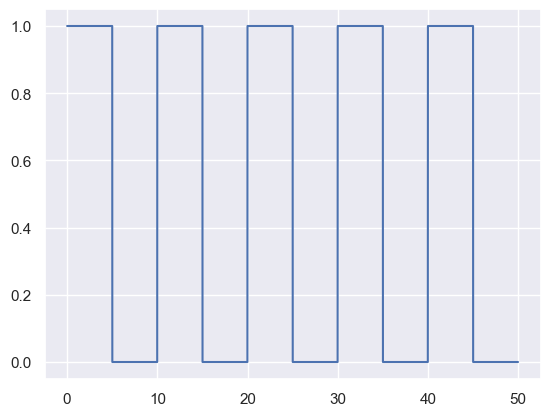

In [5]:
meander = create_meander(t, 10)
plt.plot(t, meander)
plt.show()

# Свертка

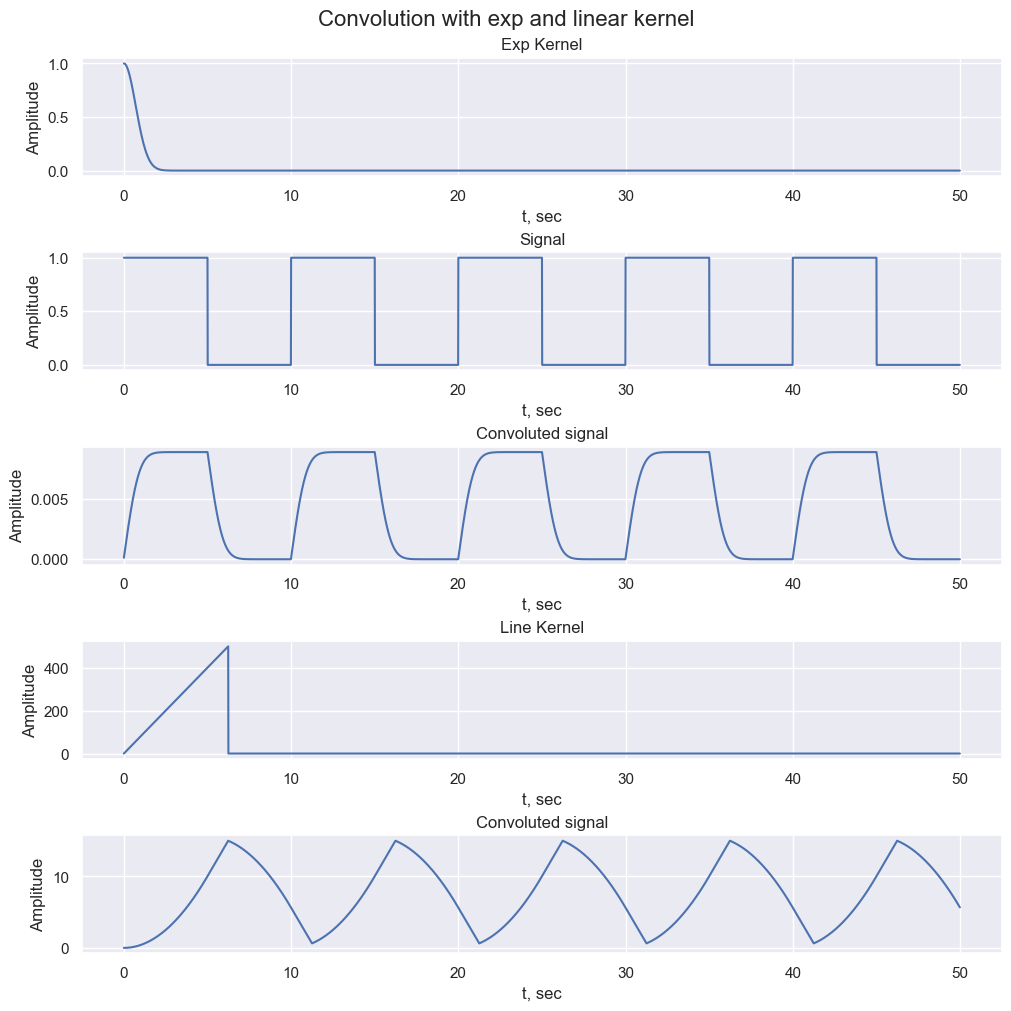

In [6]:
A = 1
exp_kernel = A * np.exp(-t ** 2)
line_kernel = np.zeros(len(t))
for i in range(len(t)//8):
    line_kernel[i] = i
exp_cs = np.convolve(meander, exp_kernel)
line_cs = np.convolve(meander, line_kernel)

fig, axs = plt.subplots(5, constrained_layout = True)
fig.set_figheight(10)
fig.set_figwidth(10)
fig.suptitle('Convolution with exp and linear kernel', fontsize=16)

axs[0].set_title('Exp Kernel')
axs[0].plot(t, exp_kernel)
axs[0].set(xlabel='t, sec', ylabel='Amplitude')

axs[1].set_title('Signal')
axs[1].plot(t, meander)
axs[1].set(xlabel='t, sec', ylabel='Amplitude')

axs[2].set_title('Convoluted signal')
axs[2].plot(t, exp_cs[:len(exp_cs)//2+1] / len(exp_cs))
axs[2].set(xlabel='t, sec', ylabel='Amplitude')

axs[3].set_title('Line Kernel')
axs[3].plot(t, line_kernel)
axs[3].set(xlabel='t, sec', ylabel='Amplitude')

axs[4].set_title('Convoluted signal')
axs[4].plot(t, line_cs[:len(line_cs)//2+1] / len(line_cs))
axs[4].set(xlabel='t, sec', ylabel='Amplitude')

plt.show()

# Теорема о свертке

C:\Users\HUAWEI\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


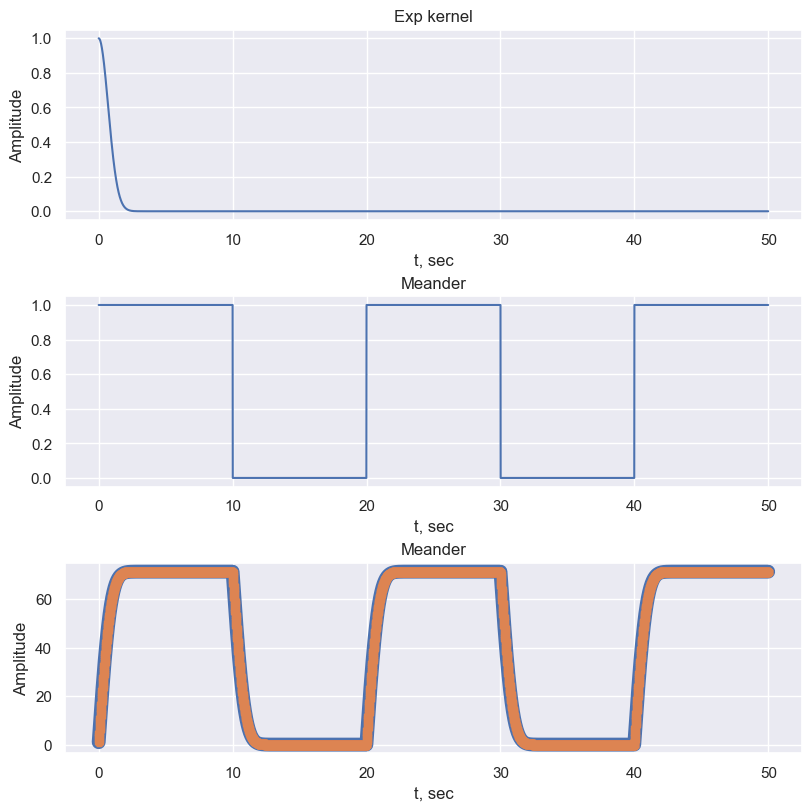

In [7]:
A = 1
exp_kernel = A * np.exp(-t ** 2)
meander = create_meander(t, 20)

meander = np.concatenate((meander, np.zeros(len(meander)-1)))
exp_kernel = np.concatenate((exp_kernel, (np.zeros(len(exp_kernel)-1))))

time_cs = np.convolve(meander, exp_kernel)
freq_cs = np.fft.ifft(np.fft.fft(exp_kernel) * np.fft.fft(meander))

fig, axs = plt.subplots(3, constrained_layout = True)
fig.set_figheight(8)
fig.set_figwidth(8)

axs[0].set_title('Exp kernel')
axs[0].plot(t, exp_kernel[:len(t)])
axs[0].set(xlabel='t, sec', ylabel='Amplitude')

axs[1].set_title('Meander')
axs[1].plot(t, meander[:len(t)])
axs[1].set(xlabel='t, sec', ylabel='Amplitude')

axs[2].set_title('Meander')
axs[2].plot(t, time_cs[:len(t)], linewidth=10,)
axs[2].plot(t, freq_cs[:len(t)], '8')
axs[2].set(xlabel='t, sec', ylabel='Amplitude')

plt.show()


---
# : Convolution with time-domain Gaussian (smoothing filter)
---


In [8]:
# simulation parameters
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 15 # poles for random interpolation
## create signal
# noise level, measured in standard deviations
noiseamp = 5
# amplitude modulator and noise level
ampl    = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise   = noiseamp * np.random.randn(n)
signal1 = ampl + noise
# subtract mean to eliminate DC
signal1 = signal1 - np.mean(signal1)
## create the Gaussian kernel
# full-width half-maximum: the key Gaussian parameter
fwhm = 25 # in ms
# normalized time vector in ms
k = 100
gtime = 1000*np.arange(-k,k)/srate
# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
# then normalize Gaussian to unit energy
gauswin = gauswin / np.sum(gauswin)

In [9]:
### filter as time-domain convolution
# initialize filtered signal vector
filtsigG = copy.deepcopy(signal1)
# implement the running mean filter
for i in range(k+1,n-k-1):
    # each point is the weighted average of k surrounding points
    filtsigG[i] = np.sum( signal1[i-k:i+k]*gauswin )
## now repeat in the frequency domain
# compute N's
nConv = n
# FFTs
dataX = scipy.fftpack.fft(signal1,nConv)
gausX = scipy.fftpack.fft(gauswin,nConv)

# frequencies vector
hz = np.linspace(0,srate,nConv)

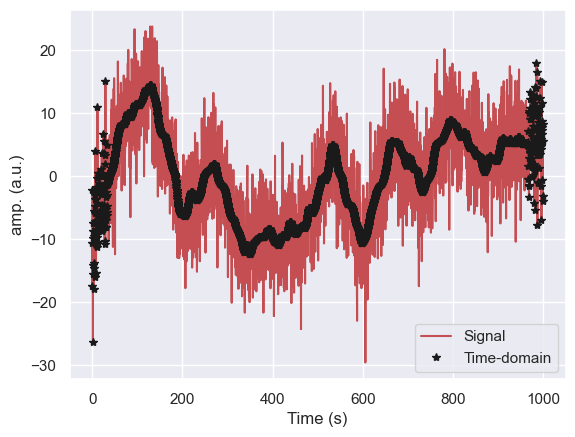

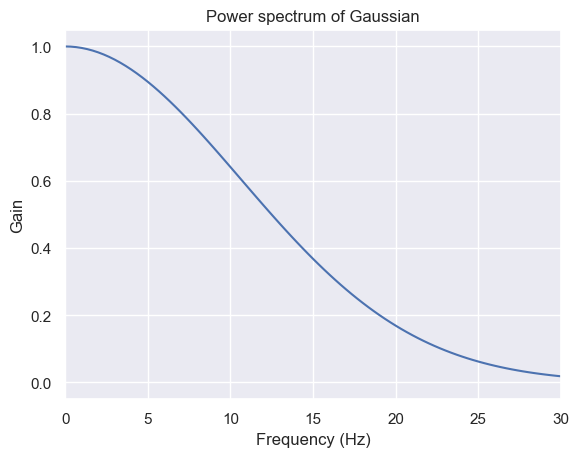

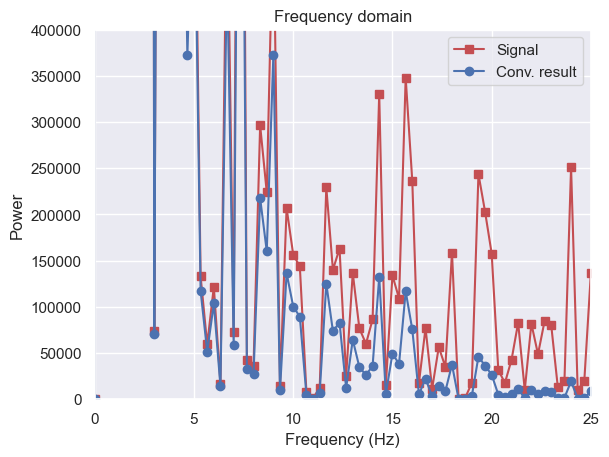

In [10]:
### time-domain plot
# lines
plt.plot(hz,signal1,'r',label='Signal')
plt.plot(hz,filtsigG,'k*',label='Time-domain')

plt.xlabel('Time (s)')
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.show()
### frequency-domain plot
# plot Gaussian kernel
plt.plot(hz,np.abs(gausX)**2)
plt.xlim([0,30])
plt.ylabel('Gain'), plt.xlabel('Frequency (Hz)')
plt.title('Power spectrum of Gaussian')
plt.show()
# raw and filtered data spectra
plt.plot(hz,np.abs(dataX)**2,'rs-',label='Signal')
plt.plot(hz,np.abs(dataX*gausX)**2,'bo-',label='Conv. result')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Power')
plt.legend()
plt.title('Frequency domain')
plt.xlim([0,25])
plt.ylim([0,400000])
plt.show()

# Frequency domain

In [11]:
srate = 1000 # Hz
time  = np.arange(0,3,1/srate)
n     = len(time)
p     = 15 # poles for random interpolation
noiseamp = 5
hz = np.linspace(0, srate, n)

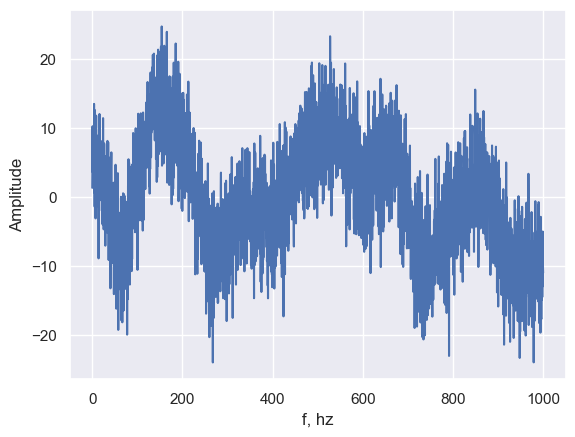

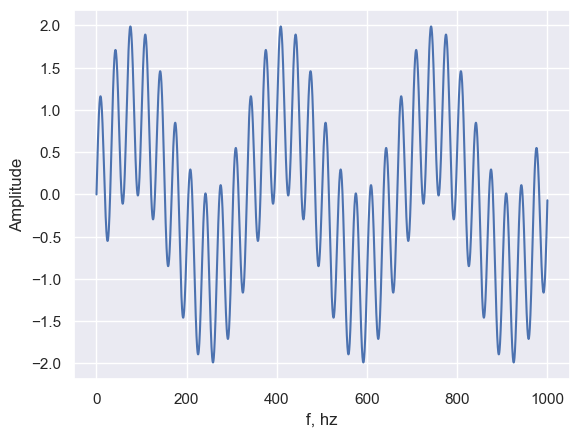

In [12]:
ampl    = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
noise   = noiseamp * np.random.randn(n)
signal1 = ampl + noise
signal1 = signal1 - np.mean(signal1)
signal2 = np.sin(1 * 2 * np.pi * time) + np.sin(1 * 20 * np.pi * time)
signal4 = np.sin(2 * np.pi * time) + np.sin(2*np.pi * 3 * time) + np.sin(2 * np.pi * 16 * time) + np.sin(2*np.pi*time*25) 

plt.plot(hz, signal1)
plt.ylabel('Amplitude')
plt.xlabel('f, hz')
plt.show()
plt.plot(hz, signal2)
plt.ylabel('Amplitude')
plt.xlabel('f, hz')
plt.show()

In [13]:
p = 10
fwhm = 4
s = fwhm * 2 * (2 * np.pi - 1) / (4 * np.pi)
g = np.exp(-.5 * ((hz - p) / s) ** 2)
fs = np.real(np.fft.ifft(g * scipy.fftpack.fft(signal1)))
fs2 = np.real(np.fft.ifft(g * scipy.fftpack.fft(signal2)))

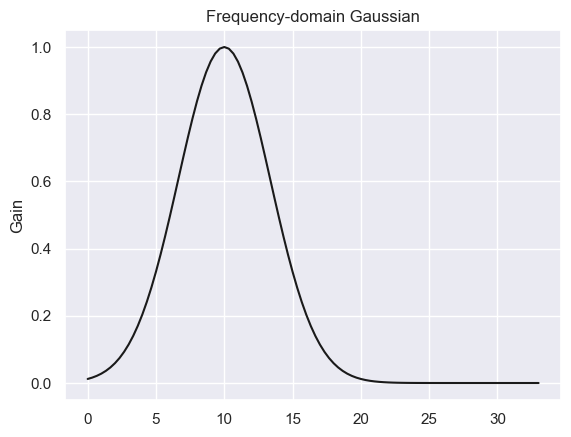

In [14]:
plt.plot(hz[:100],g[:100],'k')
plt.ylabel('Gain')
plt.title('Frequency-domain Gaussian')
plt.show()

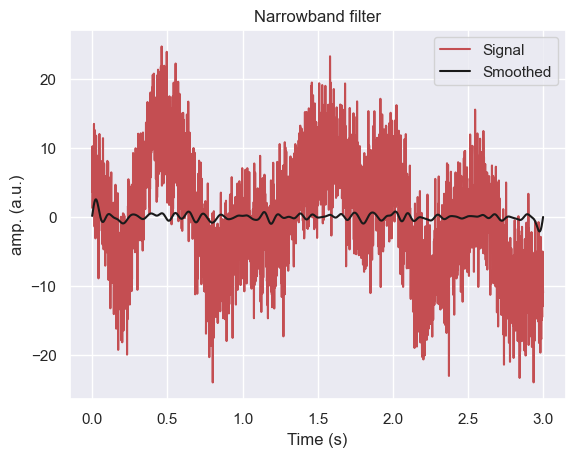

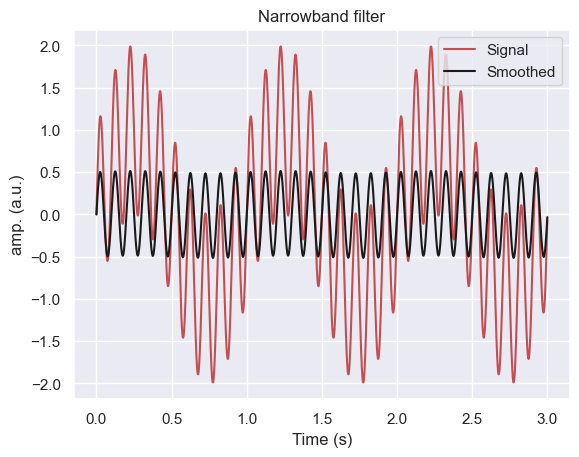

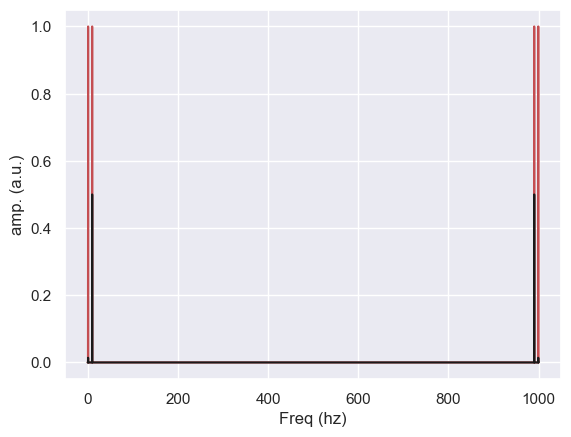

In [15]:
plt.plot(time,signal1,'r',label='Signal')
plt.plot(time, fs,'k',label='Smoothed')
plt.xlabel('Time (s)'), plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Narrowband filter')
plt.show()

plt.plot(time,signal2,'r',label='Signal')
plt.plot(time, fs2,'k',label='Smoothed')
plt.xlabel('Time (s)'), 
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Narrowband filter')
plt.show()


plt.plot(hz, np.abs(np.fft.fft(signal2)) * 2 / len(time),'r',label='Orig')
plt.plot(hz, np.abs(np.fft.fft(fs2)) * 2 / len(time),'k',label='Filtered')
plt.xlabel('Freq (hz)'), 
plt.ylabel('amp. (a.u.)')
plt.show()

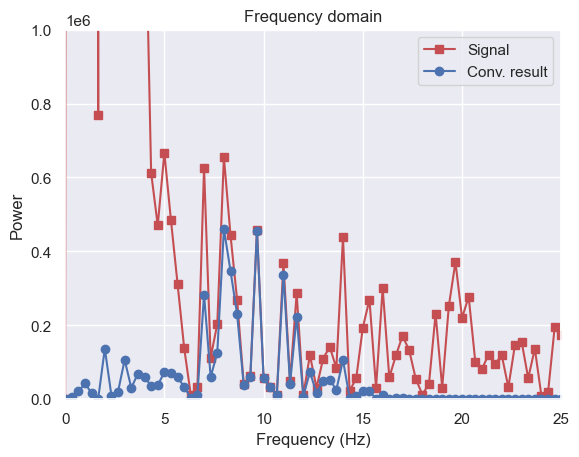

In [16]:
plt.plot(hz,np.abs(scipy.fftpack.fft(signal1))**2,'rs-',label='Signal')
plt.plot(hz,np.abs(scipy.fftpack.fft(signal1)*g)**2,'bo-',label='Conv. result')
plt.xlabel('Frequency (Hz)'), plt.ylabel('Power')
plt.legend()
plt.title('Frequency domain')
plt.xlim([0, 25])
plt.ylim([0, 1e6])
plt.show()

# Фильтр нижних частот

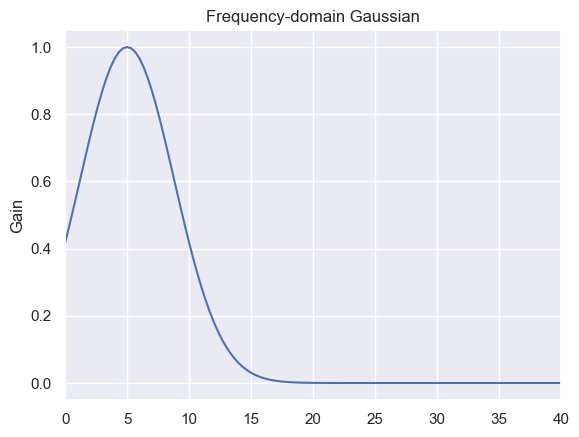

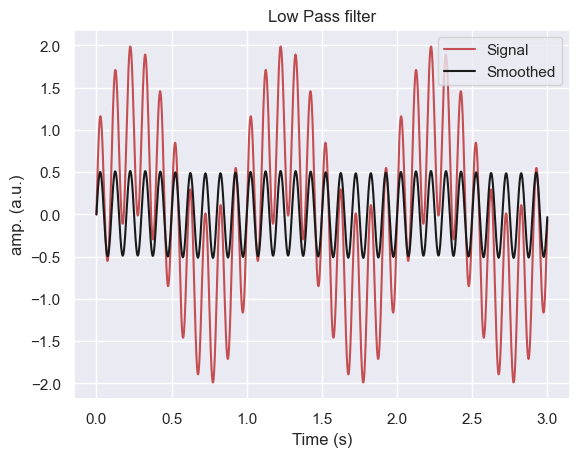

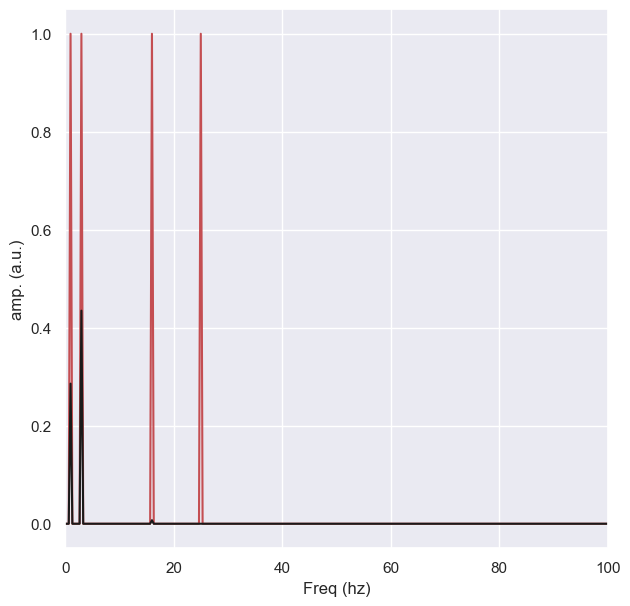

In [17]:
#freq [2,3,16,25]
p = 5
fwhm = 4.5
s = fwhm * 2 * (2 * np.pi - 1) / (4 * np.pi)
g = np.exp(-.5 * ((hz - p) / s) ** 2)
fs4 = np.real(np.fft.ifft(g * scipy.fftpack.fft(signal4)))

plt.plot(hz, g)
plt.ylabel('Gain')
plt.title('Frequency-domain Gaussian')
plt.xlim([0,40])
plt.show()

plt.plot(time,signal2,'r',label='Signal')
plt.plot(time, fs2,'k',label='Smoothed')
plt.xlabel('Time (s)'), 
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('Low Pass filter')
plt.show()

plt.figure(figsize=(7,7))
plt.plot(hz, np.abs(scipy.fftpack.fft(signal4)) * 2 / len(time),'r',label='Orig')
plt.plot(hz, np.abs(scipy.fftpack.fft(fs4)) * 2 / len(time),'k',label='Filtered')
plt.xlabel('Freq (hz)'), 
plt.ylabel('amp. (a.u.)')
plt.xlim([0, 100])
plt.show()


# Planck taper filter



In [18]:
def planck_taper_filter(t: np.array, N, e):
    pf = np.zeros(len(t))
    for i in range(len(t)):
        if (0 < t[i] < (N - 1)):
            zl = e * (N - 1) * (1/t[i] + 1/(t[i] - e * (N - 1)))
            pf[i] = 1 / (np.exp(zl) + 1)
        if (e * (N - 1) <= t[i] <= (1 - e) * (N - 1)):
            pf[i] = 1
        if ((1 - e) * (N - 1) < t[i] < (N - 1)):
            zr = e * (N - 1) * (1 / (N - 1 - t[i]) + 1 / ((1 - e) * (N - 1) - t[i]))
            pf[i] = 1 / (np.exp(zr) + 1)
    return pf

In [19]:
fwhm = 6.8
N = 1.05
e = 0.045
p = 5.8

pf = planck_taper_filter(time, N, e)
s = fwhm * 2 * (2 * np.pi - 1) / (4 * np.pi)
g = np.exp(-.5 * ((hz - p) / s) ** 2)

fs = np.real(np.fft.ifft(pf * scipy.fftpack.fft(signal1)))
fs2 = np.real(np.fft.ifft(g * scipy.fftpack.fft(signal1)))


C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_10308\3069420300.py:11: RuntimeWarning: overflow encountered in exp
  pf[i] = 1 / (np.exp(zr) + 1)


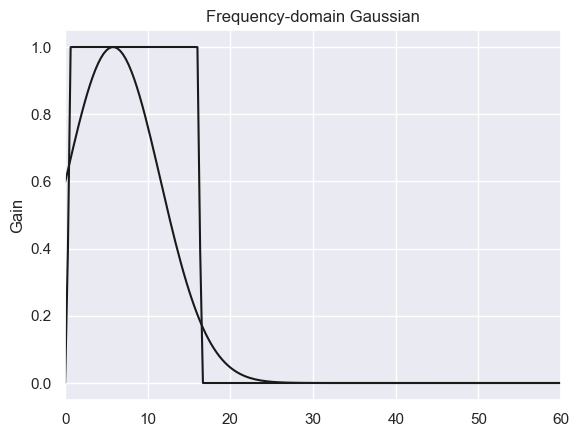

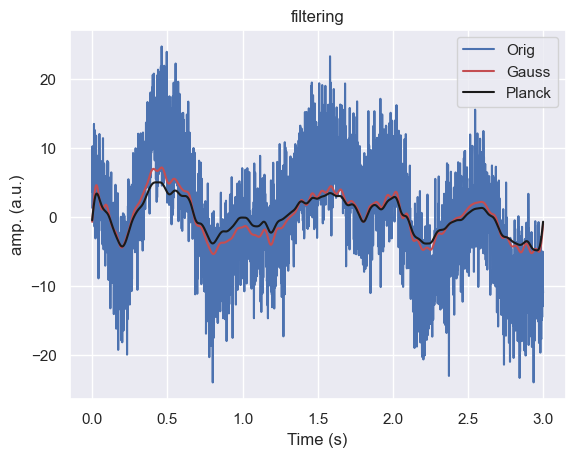

In [20]:
plt.plot(hz,pf,'k')
plt.plot(hz,g,'k')
plt.ylabel('Gain')
plt.xlim(0,60)
plt.title('Frequency-domain Gaussian')
plt.show()


plt.plot(time, signal1, label='Orig')
plt.plot(time, fs, 'r', label='Gauss')
plt.plot(time, fs2, 'k', label='Planck')
plt.xlabel('Time (s)'), 
plt.ylabel('amp. (a.u.)')
plt.legend()
plt.title('filtering')
plt.show()